<a href="https://colab.research.google.com/github/shivanth123/shivanth123.github.io/blob/main/Copy_of_Bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Importing the required libraries.

In [20]:
bitcoin = pd.read_csv('/content/sample_data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

We have downloaded the data from Kaggle and unzipped it. Let us load it into our notebook 

In [37]:
bitcoin.shape

(3137, 9)

Exploring the Dataset and Let’s print the shape of the dataset.

In [22]:
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will print the head of the dataset to see how the data looks like

Text(0, 0.5, '$ Price')

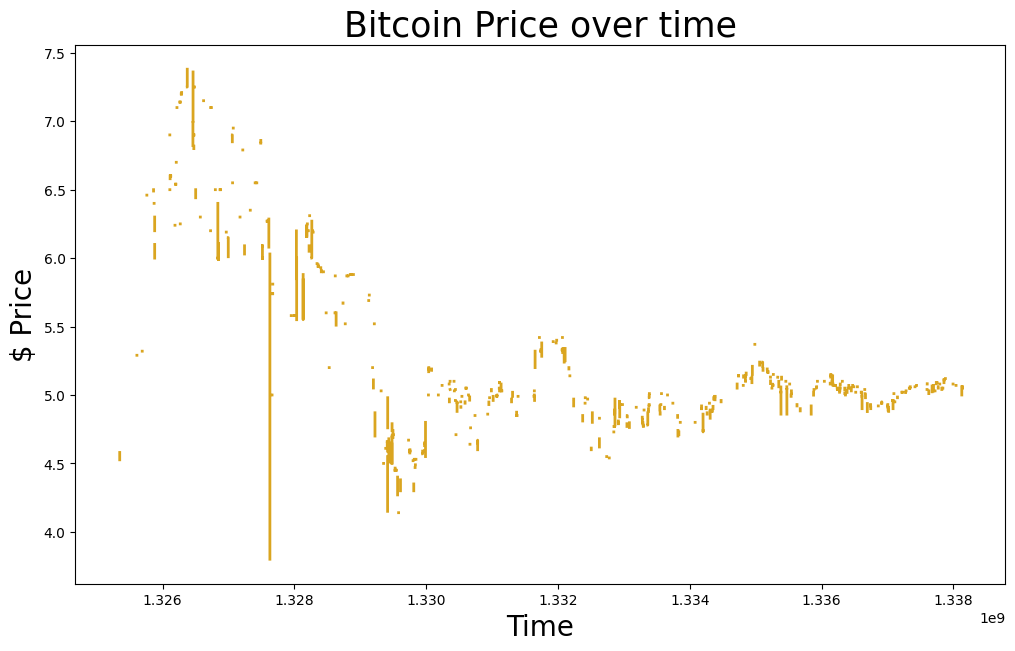

In [23]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["Timestamp"], bitcoin["Weighted_Price"], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Let us plot a graph to see how the price of Bitcoin has changed with time. For this, we will use the columns ‘Timestamp’ and ‘Weighted_Price’.

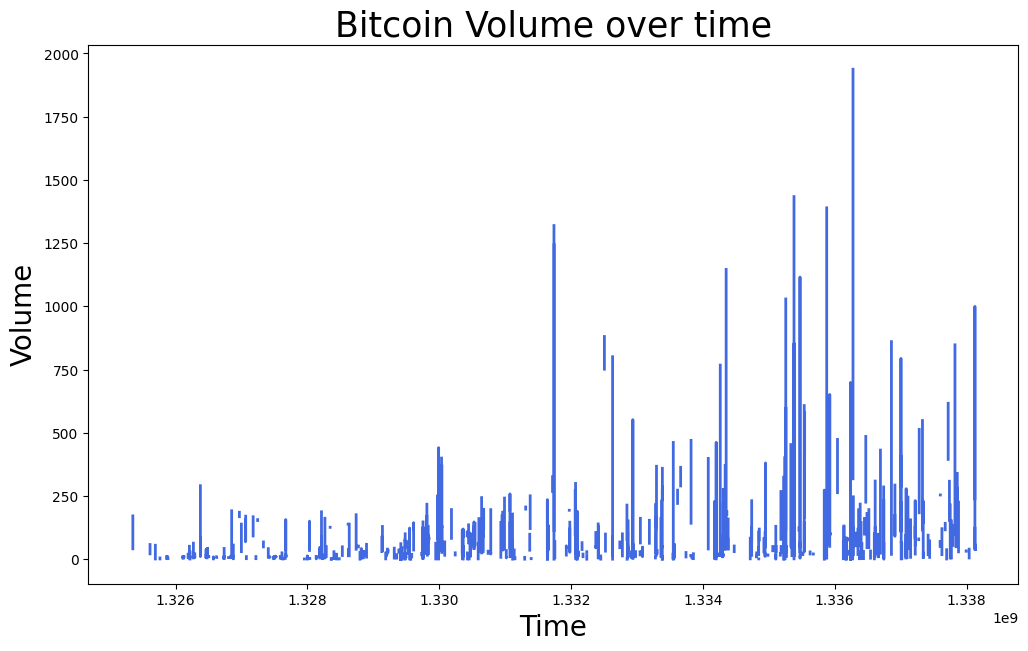

In [24]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["Timestamp"], bitcoin["Volume_(Currency)"], color='royalblue', lw=2)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20);

We will plot another graph to see how the volume of Bitcoin has changed with time. For this purpose, we will use the ‘Volume_(Currency)’ and ‘Timestamp’ columns.

In [25]:
bitcoin.isnull().sum()

Timestamp                 0
Open                 210696
High                 210696
Low                  210696
Close                210696
Volume_(BTC)         210696
Volume_(Currency)    210696
Weighted_Price       210696
dtype: int64

Let’s see how many null values are there under each column. The output shows the column names with the corresponding null value count.

In [26]:
bitcoin['Dates'] = pd.to_datetime(bitcoin['Timestamp'], unit='s')
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Dates
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00


Preprocessing the Data, Let’s create a new column ‘Dates’ storing the converted values of ‘Timestamp’ as it will be easier to comprehend simple dates than timestamps.

In [27]:
bitcoin.dropna(inplace=True)

We’ll drop the null values in the bitcoin dataset before proceeding on.

In [28]:
required_features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
output_label = 'Close'

Let us select the columns which we will use to fit our model. We will also select the target variable, i.e ‘Close’.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(
bitcoin[required_features],
bitcoin[output_label],
test_size = 0.3
)

We will now divide the bitcoin dataset into train and test parts. The test_size is 0.3, which means that 70% of the data will be allocated for training and 30% will be allocated for testing.

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Creating the Model
Let’s initialize our model now. For predicting the Bitcoin price, we are going to use LinearRegression() from sklearn.linear_model.

In [31]:
model.score(x_test, y_test)

0.999879900098789

We’ll calculate the score of the model to see how the model performs on the test data. The model’s score is > 0.99, which means that our model did a fantastic job in predicting the prices.

In [32]:
future_set = bitcoin.shift(periods=30).tail(30)

Predicting the Prices
,We will now create a future dataset by shifting the original data by 30 days. We will use this to make predictions of future prices.

In [33]:
prediction = model.predict(future_set[required_features])

Let’s predict the prices for the future_set we just created.

Text(0, 0.5, '$ Price')

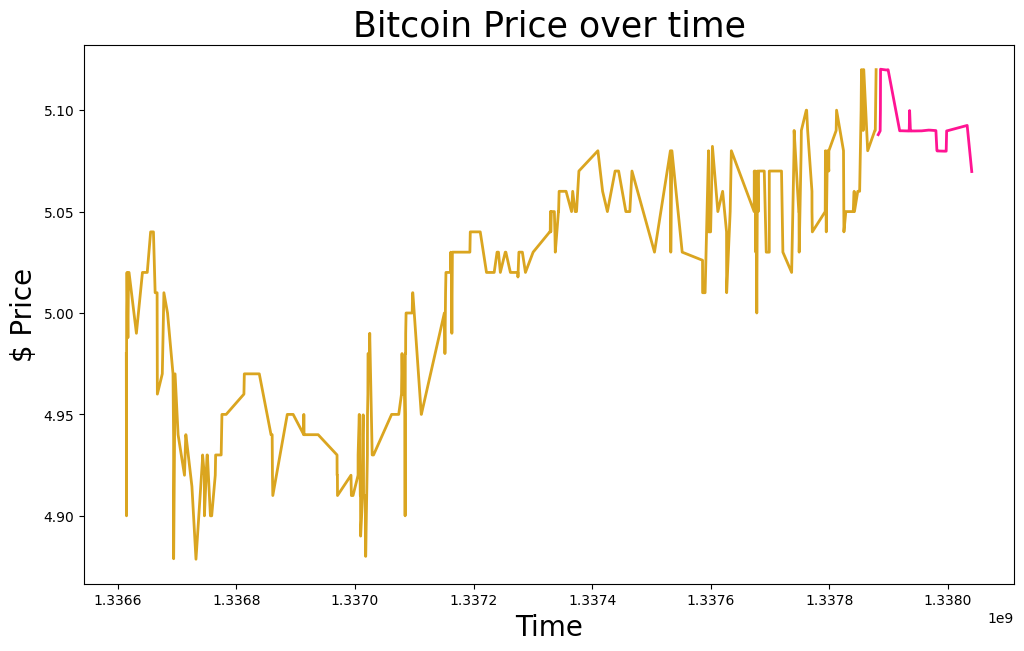

In [38]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["Timestamp"][-400:-60], bitcoin["Weighted_Price"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["Timestamp"], prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

We will plot a graph showing the previous Bitcoin (in yellow color) prices and our predicted prices (in pink color).